# Predict, Compare, and Learn (ALL WORK IS THAT)

"How do we set our weight values so that our network predicts
accurately?". Answering this question will be the main focus of this chapter, covering the
second two steps of our paradigm, "Compare", and "Learn".

# Compare

-> We will learn how to mathematically teach our network to do this.

-> This step will give us a sense for "how much we missed", but
this isn't enough to be able to learn. The output of our "compare" logic will simply be a "hot
or cold" type signal. Given some prediction, we'll calculate an error measure that will either
say "a lot" or "a little". It won't tell us why we missed, what direction we missed, or what we
should do to fix it. It more or less just says "big miss", "little miss", or "perfect prediction".

# Learn

-> Learning is all about "error attribution", or the art of figuring out how each weight played its part in creating error.

-> At the end of the day, it's going to result in computing a number for each of our weights. That number will represent how that weight should be higher or lower in order to reduce the error. Then we will move the weight according to that number, and we'll be done.

# Compare: Does our network make good predictions?

Let's measure the error and fi nd out!

The "error" is simply a way
of measuring "how much we
missed". There are multiple
ways to calculate error
as we will learn later. This
one is "Mean Squared Error"

In [1]:
knob_weight = 0.5
input = 0.5
goal_pred = 0.8

pred = input * knob_weight 

error = (pred - goal_pred) ** 2 

In [2]:
print(error)

0.30250000000000005


# Hot and Cold Learning

Wiggling our weights to see which direction reduces the error the most, moving
our weights in that direction, and repeating until the error gets to 0.

# 1) An Empty Network

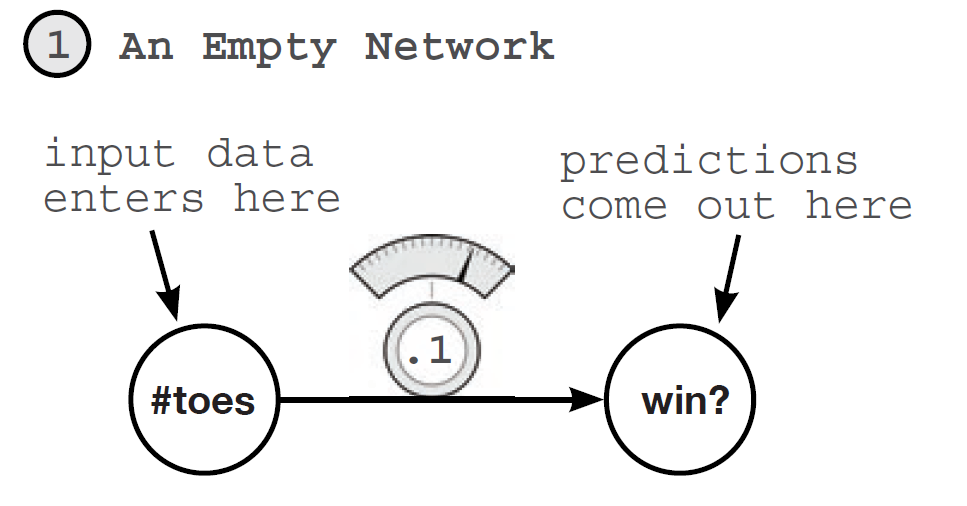

In [3]:
from IPython import display
display.Image("./4.1.png")

In [4]:
weight = 0.1
lr = 0.01

def neural_network(input, weight):
    prediction = input * weight 
    return prediction 

# 2) PREDICT: Making A Prediction And Evaluating Error

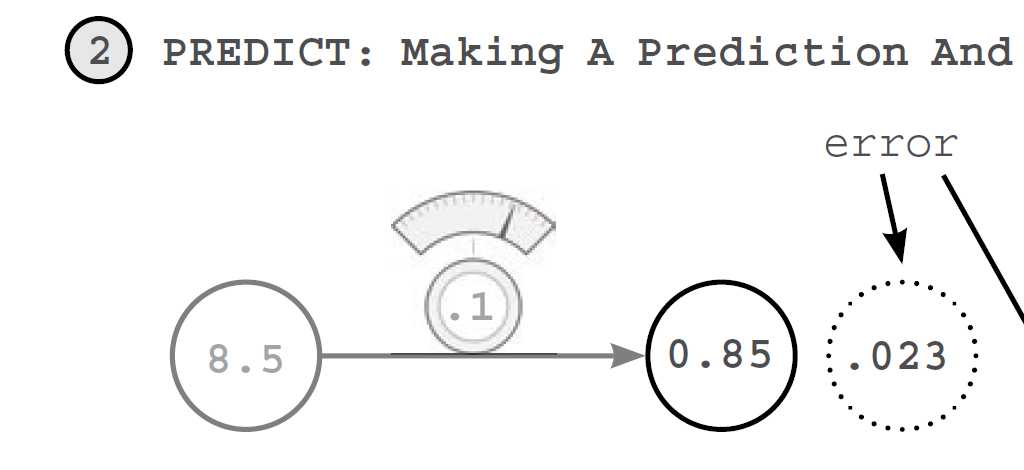

In [5]:
display.Image("./4.2.png")

In [6]:
number_of_toes = [8.5]
win_or_lose_binary = [1]  #won

input = number_of_toes[0]
true = win_or_lose_binary[0]

pred = neural_network(input, weight)

error = (pred - true) ** 2 

'''
    Forces the raw error to be positive by multiplying it by itself. Negative error wouldn't make sense.
'''

"\n    Forces the raw error to be positive by multiplying it by itself. Negative error wouldn't make sense.\n"

In [7]:
print(f'Prediction = {pred}' )
print(f'True = {true}')
print(f'Error = {error}')

Prediction = 0.8500000000000001
True = 1
Error = 0.022499999999999975


# 3) COMPARE: Making A Prediction With a Higher Weight And Evaluating Error

We want to move the weight so that the error goes downward, so we're
going to try moving the weight up and down to see which one has
the lowest error. First, we're trying moving the weight up (weight+lr).

In [8]:
lr = 0.01
p_up = neural_network(input, weight + lr) #prediction up
e_up = (p_up - true) ** 2 # error up

In [9]:
print(f'Prediction = {p_up}' )
print(f'True = {true}')
print(f'Error = {e_up}')

Prediction = 0.935
True = 1
Error = 0.004224999999999993


# 4) COMPARE: Making A Prediction With a Lower Weight And Evaluating Error

In [10]:
lr = 0.01
p_dn = neural_network(input, weight - lr)
e_dn = (p_dn - true) ** 2

In [11]:
print(f'Prediction = {p_dn}' )
print(f'True = {true}')
print(f'Error = {e_dn}')

Prediction = 0.7650000000000001
True = 1
Error = 0.05522499999999994


# 5) COMPARE + LEARN: Comparing our Errors and Setting our New Weight

These last 5 steps comprise 1 iteration of Hot and Cold Learning. Fortunately, this iteration
got us pretty close to the correct answer all by itself.

In [12]:
if (error > e_dn or error > e_up):
    if (e_dn < e_up):
        weight -= lr
    if (e_up < e_dn):
        weight += lr

# Hot and Cold Learning

In [13]:
weight = 0.5
input = 0.5
goal_prediction = 0.8
step_amount = 0.001 # how much to move our weights each iteration 

In [14]:
for iteration in range(1101): #repeat learning many times so that our error can keep getting smaller 
    
    prediction = input * weight 
    error = (prediction - goal_prediction) ** 2 
    
    print(f"Error : {error}, Prediction : {prediction}")
    
    up_prediction = input * (weight + step_amount)  # TRY UP!
    up_error = (goal_prediction - up_prediction) ** 2
    
    down_prediction = input * (weight - step_amount)  # TRY DOWN!
    down_error = (goal_prediction - down_prediction) ** 2 
    print('*************Process**********************')
    if (down_error < up_error):  #if down is better, go down!
        weight = weight - step_amount 
        print('              go down -> weight = ' , weight)
    if (down_error > up_error):  #if up is better, go up!
        weight = weight + step_amount 
        print('              go up  -> weight = ', weight)
        
    print('******************************************')

Error : 0.30250000000000005, Prediction : 0.25
*************Process**********************
              go up  -> weight =  0.501
******************************************
Error : 0.3019502500000001, Prediction : 0.2505
*************Process**********************
              go up  -> weight =  0.502
******************************************
Error : 0.30140100000000003, Prediction : 0.251
*************Process**********************
              go up  -> weight =  0.503
******************************************
Error : 0.30085225, Prediction : 0.2515
*************Process**********************
              go up  -> weight =  0.504
******************************************
Error : 0.30030400000000007, Prediction : 0.252
*************Process**********************
              go up  -> weight =  0.505
******************************************
Error : 0.2997562500000001, Prediction : 0.2525
*************Process**********************
              go up  -> weight =  0.506
********

              go up  -> weight =  0.6770000000000002
******************************************
Error : 0.21298224999999996, Prediction : 0.3385000000000001
*************Process**********************
              go up  -> weight =  0.6780000000000002
******************************************
Error : 0.21252099999999996, Prediction : 0.3390000000000001
*************Process**********************
              go up  -> weight =  0.6790000000000002
******************************************
Error : 0.21206024999999998, Prediction : 0.3395000000000001
*************Process**********************
              go up  -> weight =  0.6800000000000002
******************************************
Error : 0.21159999999999995, Prediction : 0.3400000000000001
*************Process**********************
              go up  -> weight =  0.6810000000000002
******************************************
Error : 0.21114024999999997, Prediction : 0.3405000000000001
*************Process**********************


*************Process**********************
              go up  -> weight =  0.7770000000000002
******************************************
Error : 0.16933224999999993, Prediction : 0.3885000000000001
*************Process**********************
              go up  -> weight =  0.7780000000000002
******************************************
Error : 0.16892099999999993, Prediction : 0.3890000000000001
*************Process**********************
              go up  -> weight =  0.7790000000000002
******************************************
Error : 0.16851024999999994, Prediction : 0.3895000000000001
*************Process**********************
              go up  -> weight =  0.7800000000000002
******************************************
Error : 0.16809999999999994, Prediction : 0.3900000000000001
*************Process**********************
              go up  -> weight =  0.7810000000000002
******************************************
Error : 0.16769024999999993, Prediction : 0.3905000000000001


              go up  -> weight =  0.8700000000000003
******************************************
Error : 0.1332249999999999, Prediction : 0.43500000000000016
*************Process**********************
              go up  -> weight =  0.8710000000000003
******************************************
Error : 0.1328602499999999, Prediction : 0.43550000000000016
*************Process**********************
              go up  -> weight =  0.8720000000000003
******************************************
Error : 0.13249599999999992, Prediction : 0.43600000000000017
*************Process**********************
              go up  -> weight =  0.8730000000000003
******************************************
Error : 0.13213224999999992, Prediction : 0.43650000000000017
*************Process**********************
              go up  -> weight =  0.8740000000000003
******************************************
Error : 0.13176899999999991, Prediction : 0.43700000000000017
*************Process********************

*************Process**********************
              go up  -> weight =  1.022999999999998
******************************************
Error : 0.08323225000000063, Prediction : 0.511499999999999
*************Process**********************
              go up  -> weight =  1.0239999999999978
******************************************
Error : 0.08294400000000066, Prediction : 0.5119999999999989
*************Process**********************
              go up  -> weight =  1.0249999999999977
******************************************
Error : 0.0826562500000007, Prediction : 0.5124999999999988
*************Process**********************
              go up  -> weight =  1.0259999999999976
******************************************
Error : 0.08236900000000072, Prediction : 0.5129999999999988
*************Process**********************
              go up  -> weight =  1.0269999999999975
******************************************
Error : 0.08208225000000074, Prediction : 0.5134999999999987
***

******************************************
Error : 0.0686440000000021, Prediction : 0.537999999999996
*************Process**********************
              go up  -> weight =  1.076999999999992
******************************************
Error : 0.06838225000000213, Prediction : 0.538499999999996
*************Process**********************
              go up  -> weight =  1.0779999999999919
******************************************
Error : 0.06812100000000215, Prediction : 0.5389999999999959
*************Process**********************
              go up  -> weight =  1.0789999999999917
******************************************
Error : 0.06786025000000218, Prediction : 0.5394999999999959
*************Process**********************
              go up  -> weight =  1.0799999999999916
******************************************
Error : 0.0676000000000022, Prediction : 0.5399999999999958
*************Process**********************
              go up  -> weight =  1.0809999999999915
*****

******************************************
Error : 0.03744225000000447, Prediction : 0.6064999999999885
*************Process**********************
              go up  -> weight =  1.2139999999999769
******************************************
Error : 0.03724900000000448, Prediction : 0.6069999999999884
*************Process**********************
              go up  -> weight =  1.2149999999999768
******************************************
Error : 0.03705625000000449, Prediction : 0.6074999999999884
*************Process**********************
              go up  -> weight =  1.2159999999999767
******************************************
Error : 0.0368640000000045, Prediction : 0.6079999999999883
*************Process**********************
              go up  -> weight =  1.2169999999999765
******************************************
Error : 0.03667225000000451, Prediction : 0.6084999999999883
*************Process**********************
              go up  -> weight =  1.2179999999999764
*

              go up  -> weight =  1.27599999999997
******************************************
Error : 0.026244000000004868, Prediction : 0.637999999999985
*************Process**********************
              go up  -> weight =  1.27699999999997
******************************************
Error : 0.02608225000000487, Prediction : 0.638499999999985
*************Process**********************
              go up  -> weight =  1.2779999999999698
******************************************
Error : 0.02592100000000487, Prediction : 0.6389999999999849
*************Process**********************
              go up  -> weight =  1.2789999999999697
******************************************
Error : 0.025760250000004873, Prediction : 0.6394999999999849
*************Process**********************
              go up  -> weight =  1.2799999999999696
******************************************
Error : 0.025600000000004876, Prediction : 0.6399999999999848
*************Process**********************
   

              go up  -> weight =  1.375999999999959
******************************************
Error : 0.012544000000004598, Prediction : 0.6879999999999795
*************Process**********************
              go up  -> weight =  1.376999999999959
******************************************
Error : 0.01243225000000459, Prediction : 0.6884999999999795
*************Process**********************
              go up  -> weight =  1.3779999999999588
******************************************
Error : 0.012321000000004582, Prediction : 0.6889999999999794
*************Process**********************
              go up  -> weight =  1.3789999999999587
******************************************
Error : 0.012210250000004573, Prediction : 0.6894999999999794
*************Process**********************
              go up  -> weight =  1.3799999999999586
******************************************
Error : 0.012100000000004564, Prediction : 0.6899999999999793
*************Process*********************

              go up  -> weight =  1.475999999999948
******************************************
Error : 0.003844000000003228, Prediction : 0.737999999999974
*************Process**********************
              go up  -> weight =  1.476999999999948
******************************************
Error : 0.003782250000003209, Prediction : 0.738499999999974
*************Process**********************
              go up  -> weight =  1.4779999999999478
******************************************
Error : 0.0037210000000031896, Prediction : 0.7389999999999739
*************Process**********************
              go up  -> weight =  1.4789999999999477
******************************************
Error : 0.00366025000000317, Prediction : 0.7394999999999738
*************Process**********************
              go up  -> weight =  1.4799999999999476
******************************************
Error : 0.0036000000000031506, Prediction : 0.7399999999999738
*************Process*********************

              go up  -> weight =  1.575999999999937
******************************************
Error : 0.000144000000000757, Prediction : 0.7879999999999685
*************Process**********************
              go up  -> weight =  1.576999999999937
******************************************
Error : 0.0001322500000007267, Prediction : 0.7884999999999684
*************Process**********************
              go up  -> weight =  1.5779999999999368
******************************************
Error : 0.00012100000000069633, Prediction : 0.7889999999999684
*************Process**********************
              go up  -> weight =  1.5789999999999367
******************************************
Error : 0.00011025000000066583, Prediction : 0.7894999999999683
*************Process**********************
              go up  -> weight =  1.5799999999999366
******************************************
Error : 0.00010000000000063523, Prediction : 0.7899999999999683
*************Process*************

In [15]:
weight

1.6009999999999343

# Calculating Both direction and amount from error

-> Let's measure the error and fi nd out!

In [16]:
weight = 0.5 
goal_pred = 0.1 
input = 0.5 

for iteration in range(20):
    pred = input * weight 
    error = (pred - goal_pred) ** 2   # pure error
    direction_and_amount = (pred - goal_pred) * input        #scaling, negative reversal, and stopping
    print(f'')
    weight = weight - direction_and_amount 
    
    print(f'Error : {error},  Prediction : {pred}')
    print(f'New weight : {weight}')


Error : 0.0225,  Prediction : 0.25
New weight : 0.425

Error : 0.012656249999999997,  Prediction : 0.2125
New weight : 0.36875

Error : 0.007119140625000001,  Prediction : 0.184375
New weight : 0.32656250000000003

Error : 0.004004516601562502,  Prediction : 0.16328125000000002
New weight : 0.294921875

Error : 0.002252540588378906,  Prediction : 0.1474609375
New weight : 0.27119140625

Error : 0.001267054080963134,  Prediction : 0.135595703125
New weight : 0.2533935546875

Error : 0.0007127179205417636,  Prediction : 0.12669677734375
New weight : 0.24004516601562503

Error : 0.0004009038303047423,  Prediction : 0.12002258300781252
New weight : 0.23003387451171878

Error : 0.00022550840454641755,  Prediction : 0.11501693725585939
New weight : 0.22252540588378908

Error : 0.0001268484775573598,  Prediction : 0.11126270294189454
New weight : 0.21689405441284182

Error : 7.135226862601494e-05,  Prediction : 0.10844702720642091
New weight : 0.21267054080963138

Error : 4.013565110213349e-

***What you see above is a superior form of learning known as Gradient Descent. Th is
method allows us to (in a single line of code... seen above in bold) calculate both the direction
and the amount that we should change our weight so that we reduce our error.

# One Iteration of Gradient Descent

##### This performs a weight update on a single "training example" (input->true) pair

## An Empty Network 

In [22]:
weight = 0.1
alpha = 0.01

def neural_network(input, weight):
    prediction = input * weight
    return prediction

## PREDICT: Making A Prediction And Evaluating Error

In [23]:
number_of_toes = [8.5]
win_or_lose_binary = [1]

input = number_of_toes[0]
goal_pred = win_or_lose_binary[0]

pred = neural_network(input, weight)

error = (pred - goal_pred) ** 2

In [24]:
print(f'Prediction = {pred}' )
print(f'True = {goal_pred}')
print(f'Error = {error}')

Prediction = 0.8500000000000001
True = 1
Error = 0.022499999999999975


The "error" is simply a way
of measuring "how much we
missed". There are multiple
ways to calculate error
as we will learn later. This
one is "Mean Squared Error"

## COMPARE: Calculating "Node Delta" and Putting it on the Output Node

In [25]:
delta = (pred - goal_pred)
print(f'Delta= {delta}')

Delta= -0.1499999999999999


Delta is a measurement of "how much this node missed". Thus, since the
true prediction was 1.0, and our network's prediction was 0.85, the
network was too low by 0.15. Thus, delta is negative 0.15.

**The primary diff erence between the gradient descent on the previous page and the implementation
on this page just happened. delta is a new variable. It's the "raw amount that the
node was too high or too low". Instead of computing direction_and_amount directly, we fi rst
calculate how much we wanted our output node to be diff erent. Only then do we compute our
direction_and_amount to change the weight (in step 4, now renamed "weight_delta"). **

## LEARN: Calculating "Weight Delta" and Putting it on the Weight

Weight delta is a measure of "how much this weight caused the newtork to
miss". We calculate it by multiplying the weight's output "Node Delta" by
the weight's input. Thus, we create each "Weight Delta" by scaling it's
output "Node Delta" by the weight's input. This accounts for the 3
aforementioned properties of our "direction_and_amount", scaling, negative
reversal, and stopping.

In [26]:
weight_delta = input * delta
print(f'Weight Delta= {weight_delta}')

Weight Delta= -1.2749999999999992


## LEARN: Updating the Weight

In [27]:
weight -= weight_delta * alpha
print(f'Weight = {weight}')

Weight = 0.11275


# Learning Is Just Reducing Error

Modifying weight to reduce our error.

In [28]:
weight, goal_pred, input = (0.0, 0.8, 0.5)

for iteration in range(4):
    pred = input * weight 
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred #calculated difference between prediction and real value 
    weight_delta = delta * input 
    weight = weight - weight_delta # update weight of node
    
    print(f'Error : {error}, Prediction : {pred}')

Error : 0.6400000000000001, Prediction : 0.0
Error : 0.3600000000000001, Prediction : 0.2
Error : 0.2025, Prediction : 0.35000000000000003
Error : 0.11390625000000001, Prediction : 0.4625


*** Notice
that we actually use our pred inside the error calculation. 

Let's replace our pred variable with
the code we used to generate it.

In [29]:
error = ((input * weight) - goal_pred) ** 2

### Let's say that you moved weight up by 0.5... if there is an exact relationship between error and weight... 

we should be able to calculate how much this also moves the error! What
if we wanted to move the error in a specifi c direction? Could it be done?

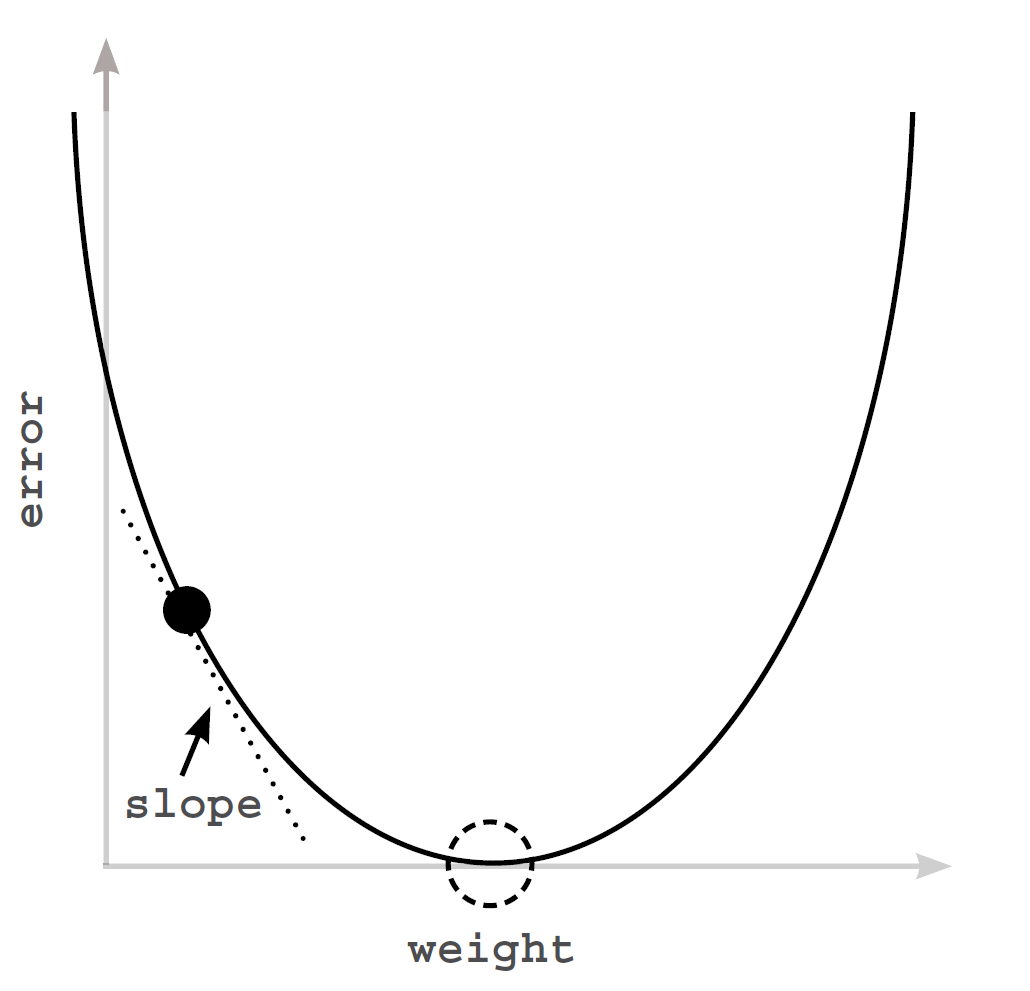

In [30]:
display.Image("./4.3.png")

### NOTE : 

This graph represents every value of error for every weight according to the relationship in the
formula above. Notice it makes a nice bowl shape. The black "dot" is at the point of BOTH our
current weight and error. Th e dotted "circle" is where we want to be (error == 0).

### EXTRA IMPORTANT INFO : 

The slope points to the bottom of the bowl (lowest error) no matter
where you are in the bowl. We can use this slope to help our neural network reduce the
error.

### Let's Watch Several Steps of Learning

#### Will we eventually find the bottom of the bowl?

In [33]:
weight, goal_pred, input = (0.0, 0.8, 1.1)

for _ in range(8):
    print(f'-----\nWeight : {weight}')
    
    pred = input * weight 
    error = (pred - goal_pred) ** 2 
    delta = pred - goal_pred 
    weight_delta = delta * input 
    weight = weight - weight_delta 
    
    print(f'Error : {error}, Prediction : {pred}')
    print(f'Delta : {delta}, Weight Delta : {weight_delta}')

-----
Weight : 0.0
Error : 0.6400000000000001, Prediction : 0.0
Delta : -0.8, Weight Delta : -0.8800000000000001
-----
Weight : 0.8800000000000001
Error : 0.02822400000000005, Prediction : 0.9680000000000002
Delta : 0.16800000000000015, Weight Delta : 0.1848000000000002
-----
Weight : 0.6951999999999999
Error : 0.0012446784000000064, Prediction : 0.76472
Delta : -0.03528000000000009, Weight Delta : -0.0388080000000001
-----
Weight : 0.734008
Error : 5.4890317439999896e-05, Prediction : 0.8074088
Delta : 0.007408799999999993, Weight Delta : 0.008149679999999992
-----
Weight : 0.72585832
Error : 2.4206629991042546e-06, Prediction : 0.798444152
Delta : -0.0015558480000000818, Weight Delta : -0.0017114328000000902
-----
Weight : 0.7275697528
Error : 1.0675123826048965e-07, Prediction : 0.80032672808
Delta : 0.00032672808000000497, Weight Delta : 0.0003594008880000055
-----
Weight : 0.727210351912
Error : 4.707729607278605e-09, Prediction : 0.7999313871032001
Delta : -6.861289679993554e-05,

## A Big Weight Increase

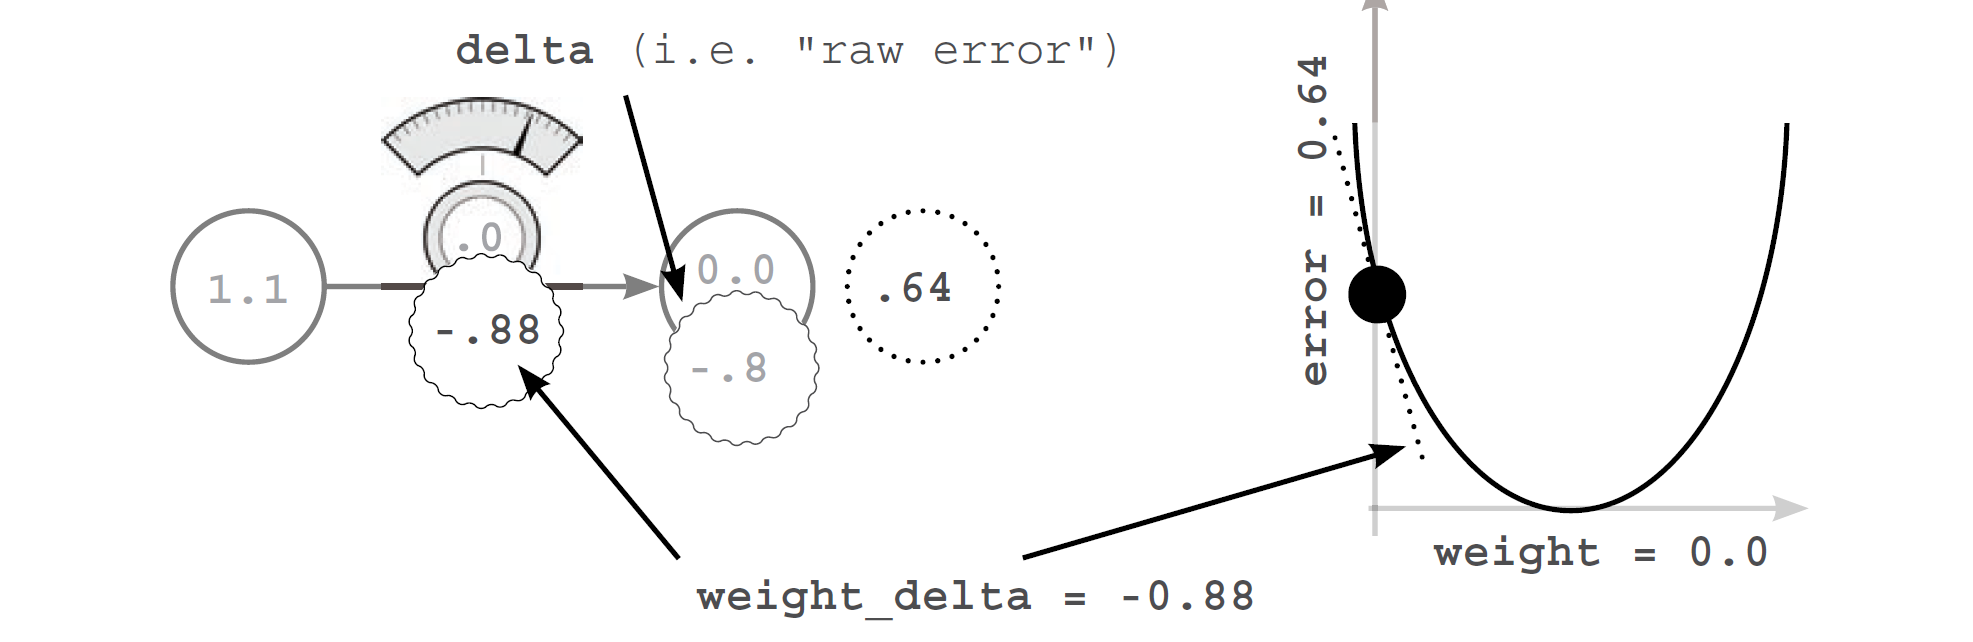

In [36]:
display.Image("./4.4.png")

"raw error" modifi ed for
scaling, negative reversal,
and stopping per this weight
and input

## Overshot a bit... Let's go back the other way

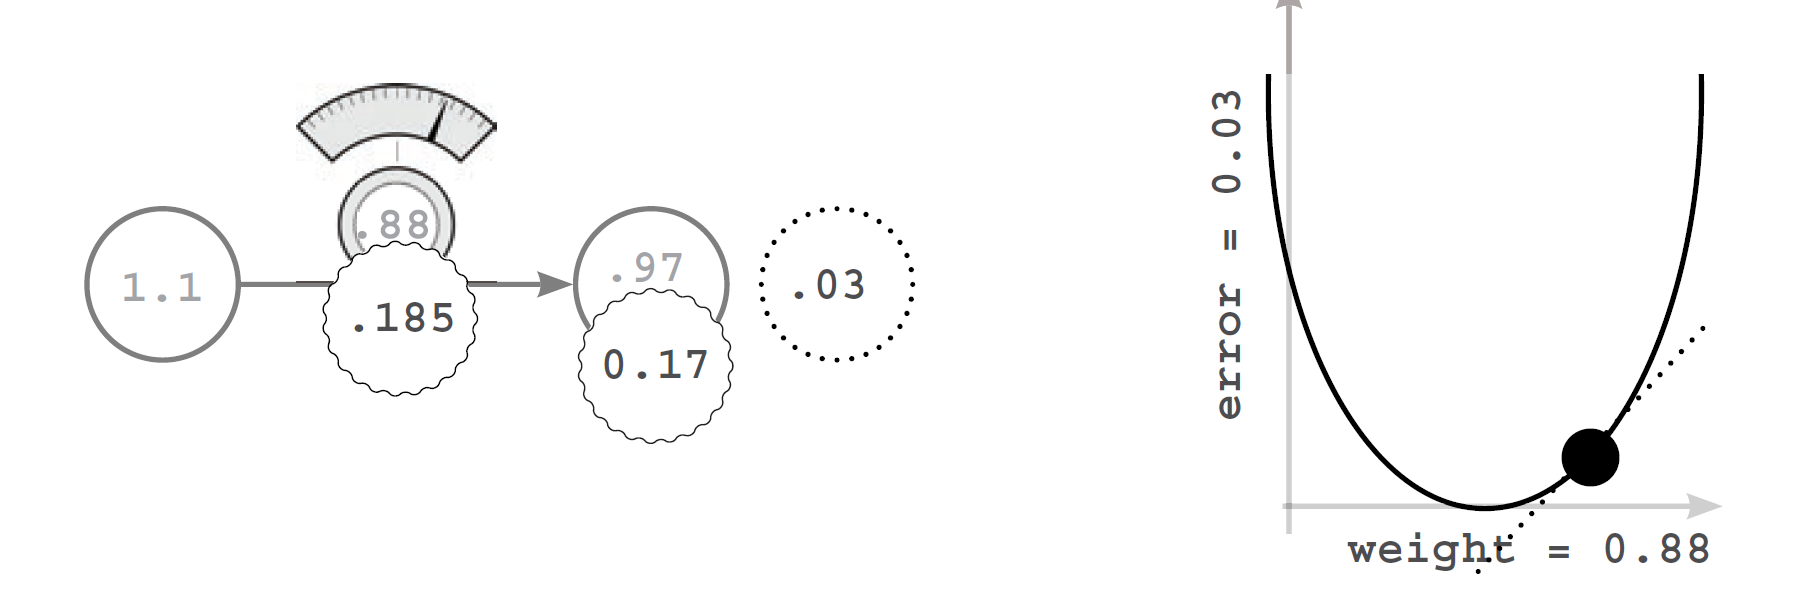

In [37]:
display.Image("./4.5.png")

## Overshot Again! Let's go back again... but only just a little

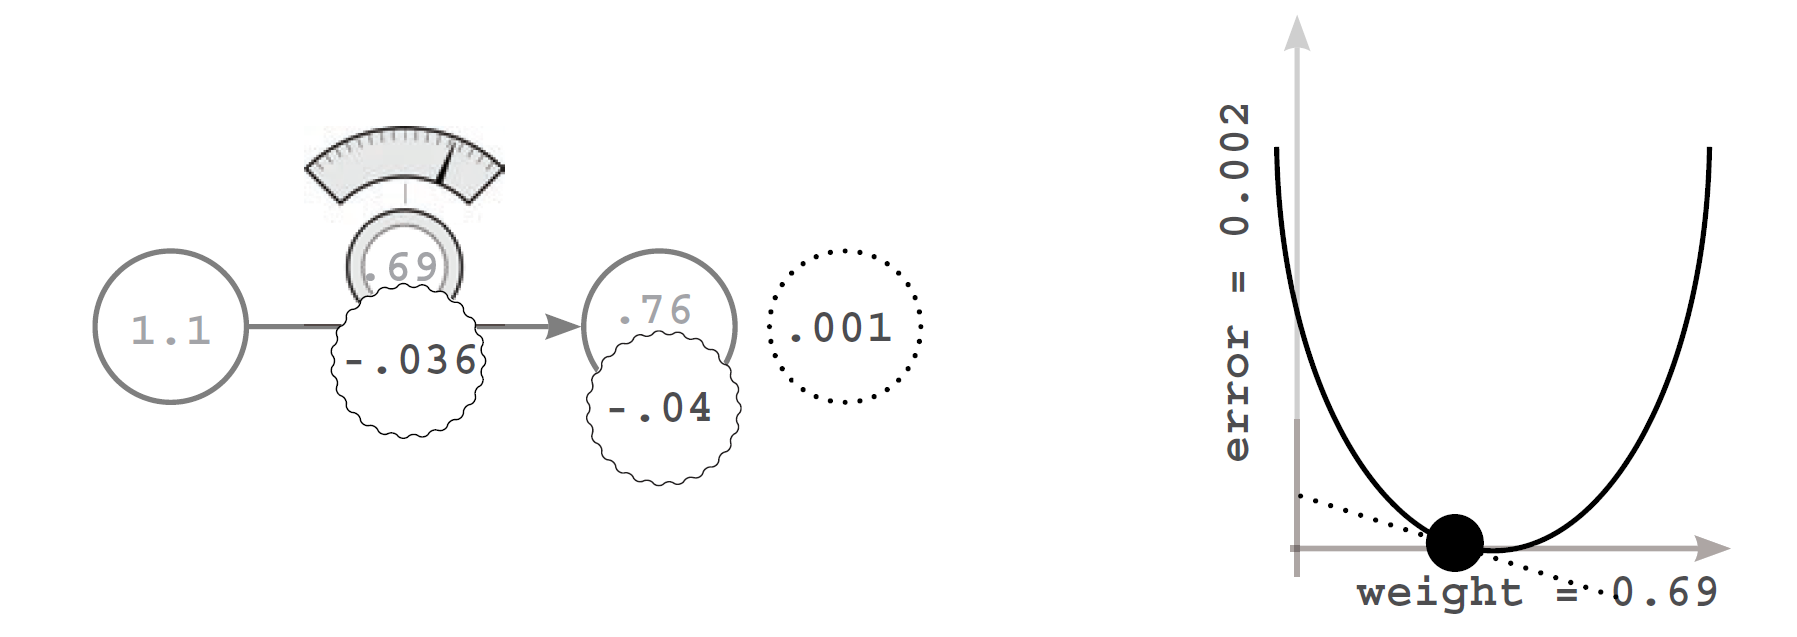

In [38]:
display.Image("./4.6.png")

## Ok, we're pretty much there...

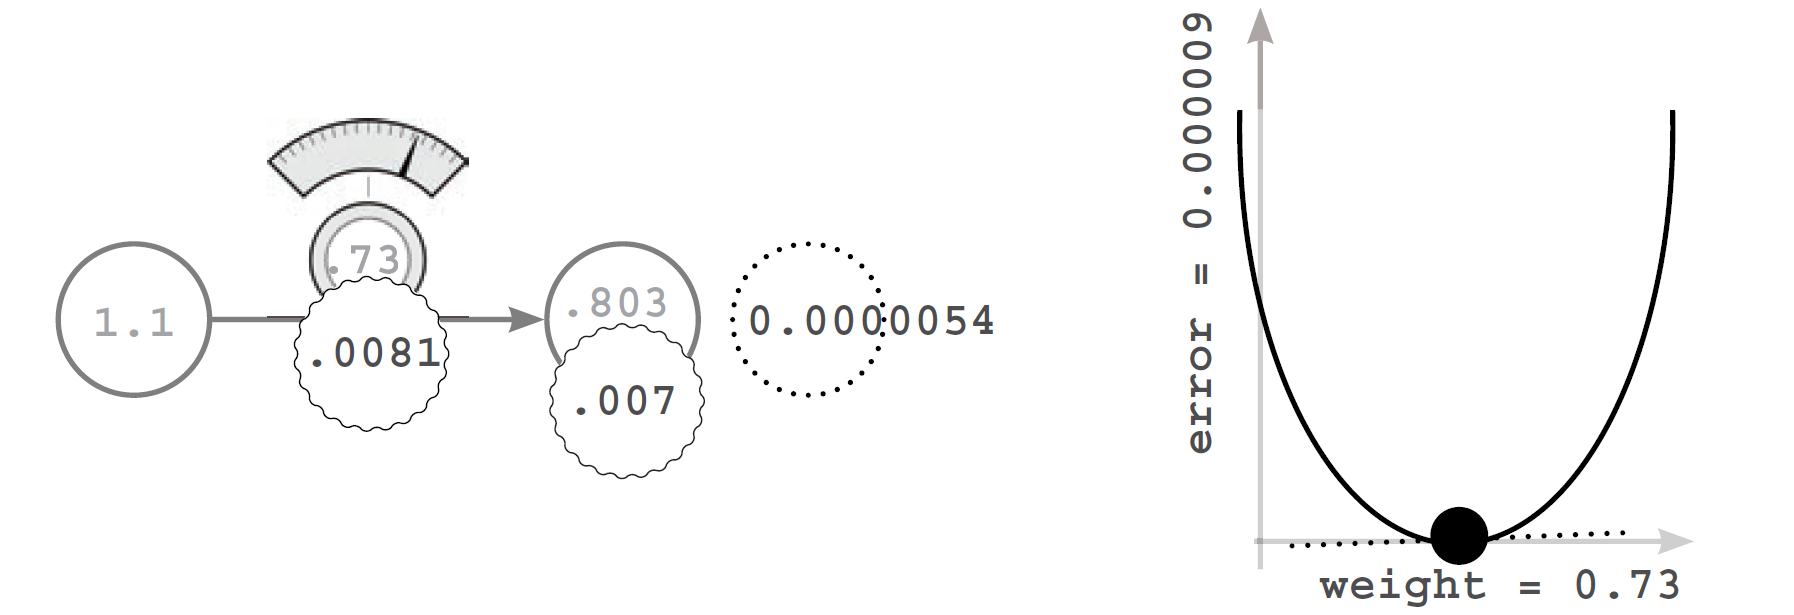

In [39]:
display.Image("./4.7.png")

# Tunnel Vision on One Concept

Concept: "Learning is adjusting our weight to reduce the error to zero"

-> Knowing how to do this is all about understanding the relationship between our weight and
our error. If we understand this relationship, we can know how to adjust our weight to reduce
our error.

-> We want to know how sensitive the error
is to the weight. We want to know the direction and the amount that the error changes when
we change the weight.

            error = ((input * weight) - goal_pred) ** 2
            
This line of code, ladies and gentlemen, is the secret. This is a formula. This is the relationship
between error and weight.This relationship is exact. It's computable. It's universal. It is and it
will always be. Now, how can we use this formula to know how to change our weight so that
our error moves in a particular direction. Now THAT is the right question! Stop. I beg you.
Stop and appreciate this moment. This formula is the exact relationship between these two
variables, and now we're going to figure out how to change one variable so that we move the
other variable in a particular direction. As it turns out, there's a method for doing this for any
formula. We're going to use it for reducing our error.

# Derivatives...

-> The derivative represents the
direction and the amount that one variable changes if you change the other variable. This is
exactly what we were looking for!

Perspectives about DERIVATIVES :

1) "how one variable in a function changes when you move another variable"

2) "a derivative is the slope at a point on a line or curve"

3) "the right of that point, the slope of the line is positive, and to the left of that point, the slope of the line is negative"

4) "the slope's sign gives us direction and the slope's steepness gives us amount."

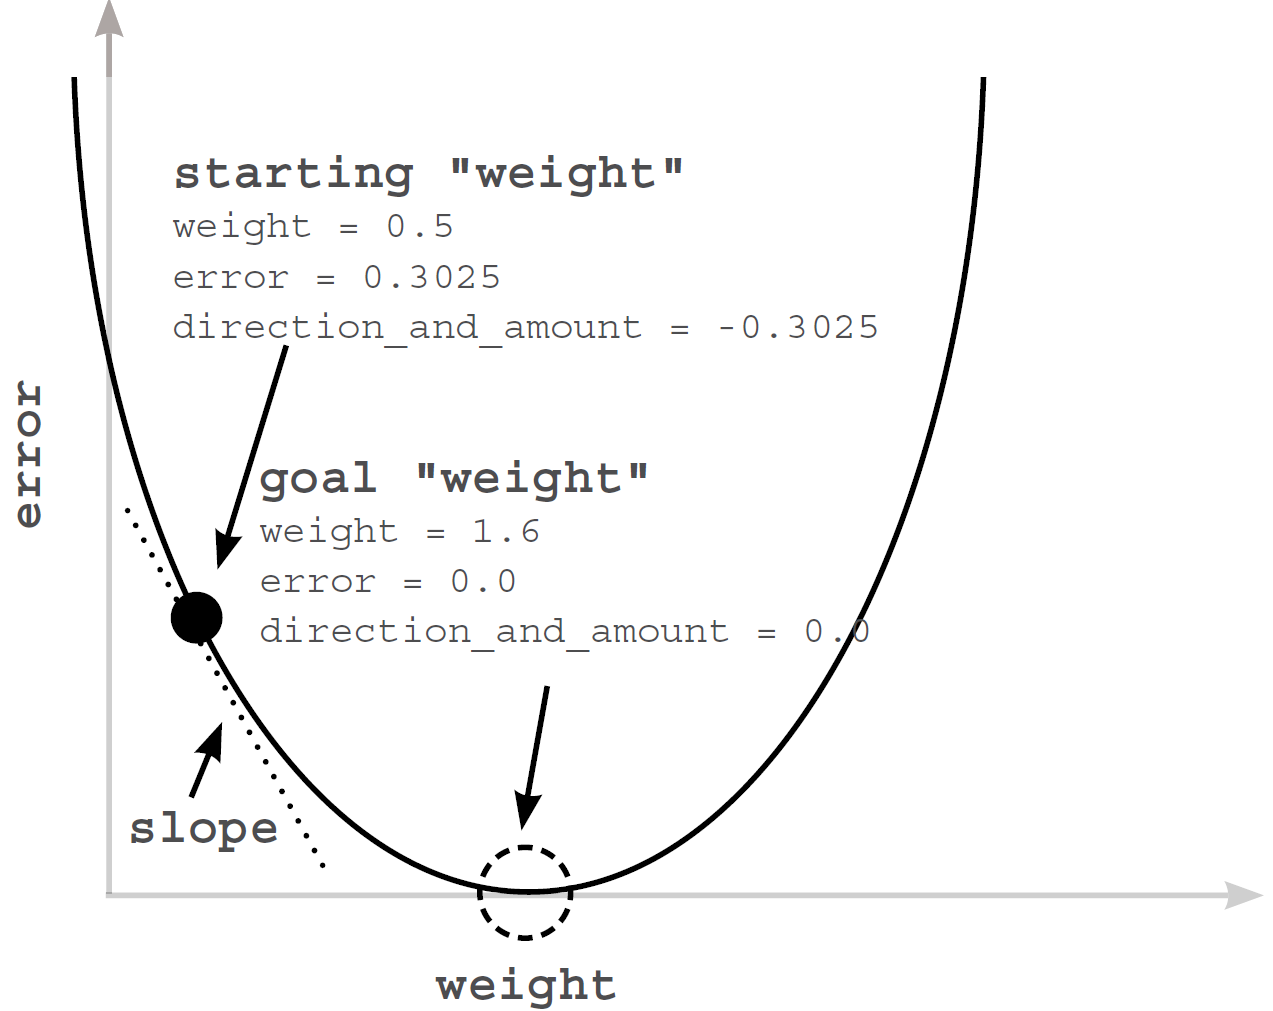

In [40]:
display.Image("./4.8.png")

-> We are trying to fi gure out the direction and the amount to change our so that our goes down. weight error

-> We use the derivative to determine the relationship between any weight and the error. We then move our weight in the opposite direction of the derivative to fi nd the lowest weight. Wallah! Our neural network learns!

-> This method for learning (fi nding error minimums) is called Gradient Descent. This name should seem intuitive! We move in the weight value opposite the gradient value, which descends our error to 0. By opposite, I simply mean that we increase our weight when we have a negative gradient and vice versa. It's like gravity!

# Introducing.... Alpha

The simplest way to prevent overcorrecting our weight updates

Th e symptom is that when we overcorrect, our new derivative is even larger in magnitude than when we started (although the sign will be the opposite).

The symptom is this overshooting. Th e solution is to multiply the weight update by a fraction to make it smaller.

If it starts diverging (going up), then your alpha is too high, and you decrease it. If learning is happening too slowly, then your alpha is too low, and you increase it

## Alpha In Code

In [44]:
weight = 0.5
goal_pred = 0.8
input = 2 
alpha = 0.1

for _ in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    derivative = input * (pred - goal_pred)
    weight = weight -(alpha * derivative)
    
    print(f'Error : {error}, Prediction : {pred}')
    
'''
    And despite all the crazy advancements of deep learning 
    in the past few years, most people just try several orders
    of magnitude of alpha (10,1,0.1,0.01,0.001,0.0001) 
    and then tweak from there to see what works best. It's more art than science.
'''

Error : 0.03999999999999998, Prediction : 1.0
Error : 0.0144, Prediction : 0.92
Error : 0.005183999999999993, Prediction : 0.872
Error : 0.0018662400000000014, Prediction : 0.8432000000000001
Error : 0.0006718464000000028, Prediction : 0.8259200000000001
Error : 0.00024186470400000033, Prediction : 0.815552
Error : 8.70712934399997e-05, Prediction : 0.8093312
Error : 3.134566563839939e-05, Prediction : 0.80559872
Error : 1.1284439629823931e-05, Prediction : 0.803359232
Error : 4.062398266736526e-06, Prediction : 0.8020155392
Error : 1.4624633760252567e-06, Prediction : 0.8012093235200001
Error : 5.264868153690924e-07, Prediction : 0.8007255941120001
Error : 1.8953525353291194e-07, Prediction : 0.8004353564672001
Error : 6.82326912718715e-08, Prediction : 0.8002612138803201
Error : 2.456376885786678e-08, Prediction : 0.8001567283281921
Error : 8.842956788836216e-09, Prediction : 0.8000940369969153
Error : 3.1834644439835434e-09, Prediction : 0.8000564221981492
Error : 1.1460471998340758

"\n    And despite all the crazy advancements of deep learning \n    in the past few years, most people just try several orders\n    of magnitude of alpha (10,1,0.1,0.01,0.001,0.0001) \n    and then tweak from there to see what works best. It's more art than science.\n"